In [65]:
import pandas as pd
import geopandas
cross_lochs = pd.read_csv('../cross_lochs_gdf_pft.csv')


In [66]:
import numpy as np
from sklearn.decomposition import PCA

In [76]:
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=5)

x = cross_lochs[cross_lochs.columns[1:359]]
y = cross_lochs[cross_lochs.columns[362]]

x = StandardScaler().fit_transform(x)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

pca_df = pd.concat([principalDf, cross_lochs[['PFT']], cross_lochs[['geometry']]], axis = 1)


pca_df['geometry'] = geopandas.GeoSeries.from_wkt(pca_df['geometry'])

pca_gdf = geopandas.GeoDataFrame(pca_df, geometry='geometry')

pca_gdf.head(2)


,principal component 1,principal component 2,PFT,geometry
0,-8.200318,13.457963,calluna_mix,POINT (444724.308 6472605.655)
1,-6.702866,14.358705,calluna_mix,POINT (444729.308 6472605.655)


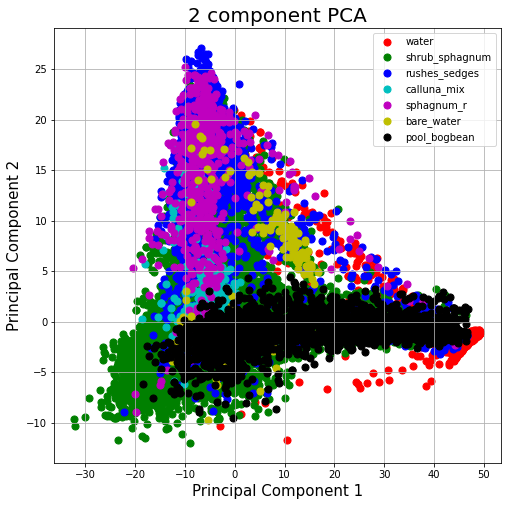

In [77]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
PFTs = ['water', 'shrub_sphagnum', 'rushes_sedges', 'calluna_mix', 'sphagnum_r', 'bare_water', 'pool_bogbean']
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for PFT, color in zip(PFTs,colors):
    indicesToKeep = pca_df['PFT'] == PFT
    ax.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(PFTs)
ax.grid()

In [78]:
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.90382147, 0.07148275])

In [80]:
# pca_gdf.to_file("cross_lochs_pca.shp")

/tmp/ipykernel_1868/842022299.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  pca_gdf.to_file("cross_lochs_pca.shp")


In [81]:
# pca_gdf.to_csv("cross_lochs_pca.csv")